In [1]:
import pandas as pd
file_path = "/Users/cxx0_0mwmw/Desktop/creditcard.csv"
df = pd.read_csv(file_path)
print(df.head())

############################# Check rows/columns
print(df.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
############################# Check missing value
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if missing_values.empty:
    print("No missing values in the dataset!")
else:
    print("Missing values found in the dataset:")
    print(missing_values)

No missing values in the dataset!


In [2]:
############################# Check for data imbalance with respect to the target variable (Class)
# Class = 0 Non-Fraud；Class = 1 Fraud
class_counts = df["Class"].value_counts()
print("Class Distribution:")
print(class_counts)
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100
print(f"\nPercentage of Fraudulent Transactions: {fraud_percentage:.4f}%")

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraudulent Transactions: 0.1727%


/var/folders/q5/j5tdx6xs22g7pp9ml9x0slb00000gn/T/ipykernel_74503/2367270639.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])


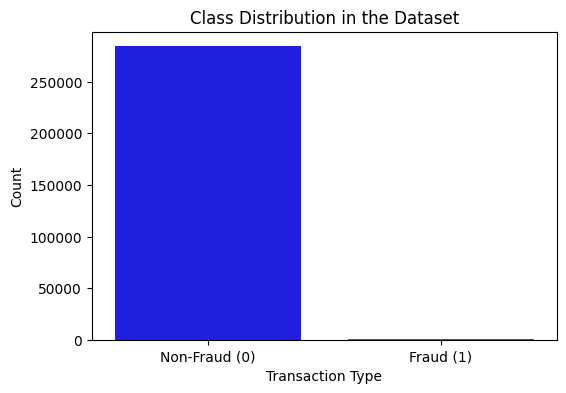

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
############################# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Class Distribution in the Dataset")
plt.show()

Resampled Class Distribution:
Class
0    284315
1    284315
Name: count, dtype: int64

Original fraud count: 492
New fraud count after SMOTE: 284315
Fraud samples added: 283823


/var/folders/q5/j5tdx6xs22g7pp9ml9x0slb00000gn/T/ipykernel_74503/1001875106.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resampled_counts.index, y=resampled_counts.values, palette=["blue", "red"])


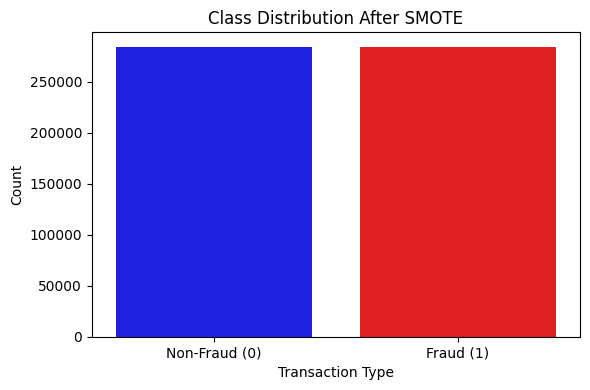

In [ ]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_counts = pd.Series(y_resampled).value_counts()
print("Resampled Class Distribution:")
print(resampled_counts)

original_fraud = y.value_counts()[1]
new_fraud = resampled_counts[1]
print(f"\nOriginal fraud count: {original_fraud}")
print(f"New fraud count after SMOTE: {new_fraud}")
print(f"Fraud samples added: {new_fraud - original_fraud}")

plt.figure(figsize=(6, 4))
sns.barplot(x=resampled_counts.index, y=resampled_counts.values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.tight_layout()
plt.show()



Resampled Class Distribution (K-Means):
0    492
1    492
dtype: int64


/var/folders/q5/j5tdx6xs22g7pp9ml9x0slb00000gn/T/ipykernel_74503/3259314342.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resampled_counts_km.index, y=resampled_counts_km.values, palette=["blue", "red"])


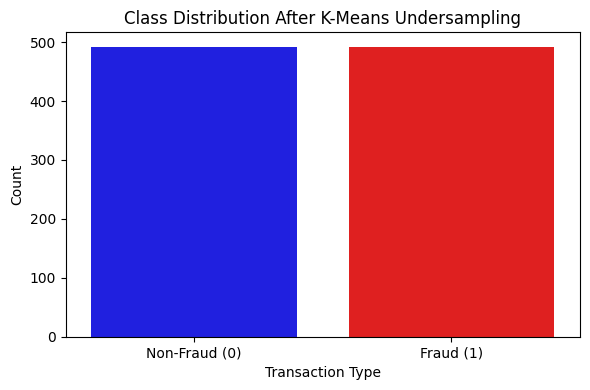


Original non-fraud count: 284315
New non-fraud count after K-Means: 492
Non-fraud samples removed: 283823


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import ClusterCentroids
from collections import Counter

# Apply K-Means Undersampling (Cluster Centroids)
undersampler = ClusterCentroids(random_state=42)
X_resampled_km, y_resampled_km = undersampler.fit_resample(X, y)

# Check new class distribution
resampled_counts_km = pd.Series(Counter(y_resampled_km))
print("Resampled Class Distribution (K-Means):")
print(resampled_counts_km)

# Plot class distribution after K-Means undersampling
plt.figure(figsize=(6, 4))
sns.barplot(x=resampled_counts_km.index, y=resampled_counts_km.values, palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Non-Fraud (0)", "Fraud (1)"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Class Distribution After K-Means Undersampling")
plt.tight_layout()
plt.savefig("kmeans_undersample_dist.png", dpi=300)
plt.show()

# Print number of majority class samples removed
original_nonfraud_count = y.value_counts()[0]
new_nonfraud_count = resampled_counts_km[0]
samples_removed = original_nonfraud_count - new_nonfraud_count
print(f"\nOriginal non-fraud count: {original_nonfraud_count}")
print(f"New non-fraud count after K-Means: {new_nonfraud_count}")
print(f"Non-fraud samples removed: {samples_removed}")


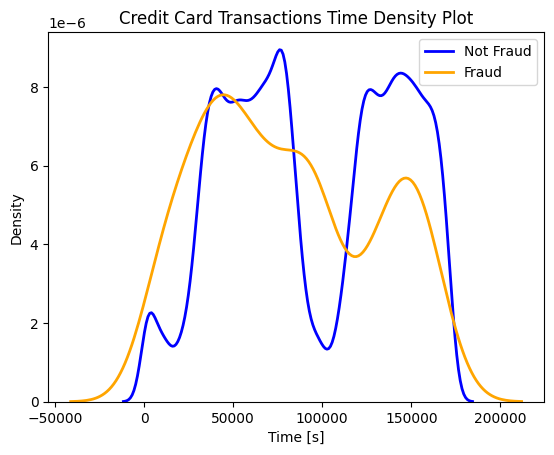

In [5]:
############################# Plot Transaction Time Density Plot for Both Classes
sns.kdeplot(df[df["Class"] == 0]["Time"], label="Not Fraud", color="blue", linewidth=2)
sns.kdeplot(df[df["Class"] == 1]["Time"], label="Fraud", color="orange", linewidth=2)
plt.xlabel("Time [s]")
plt.ylabel("Density")
plt.title("Credit Card Transactions Time Density Plot")
plt.legend()
plt.show()

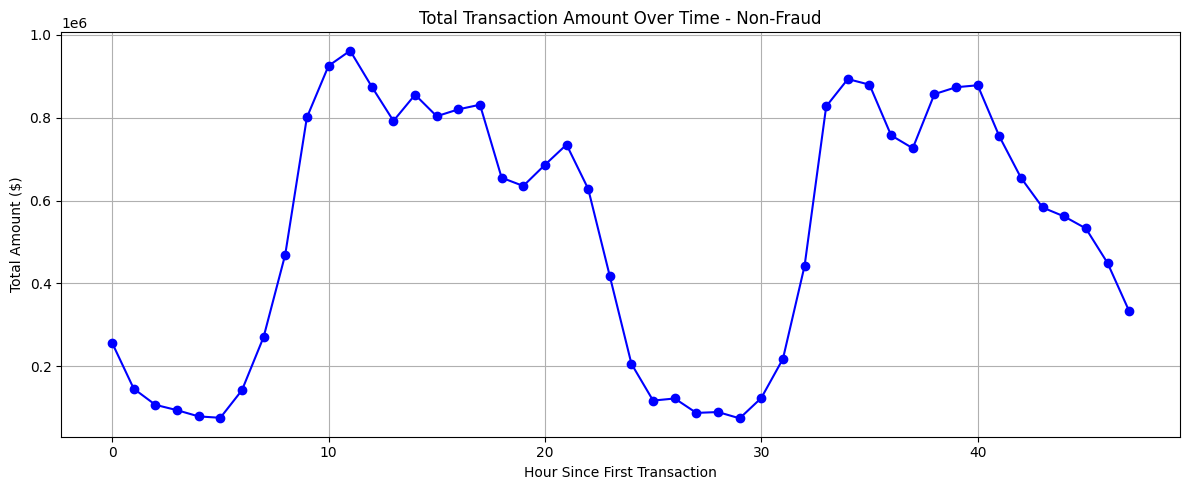

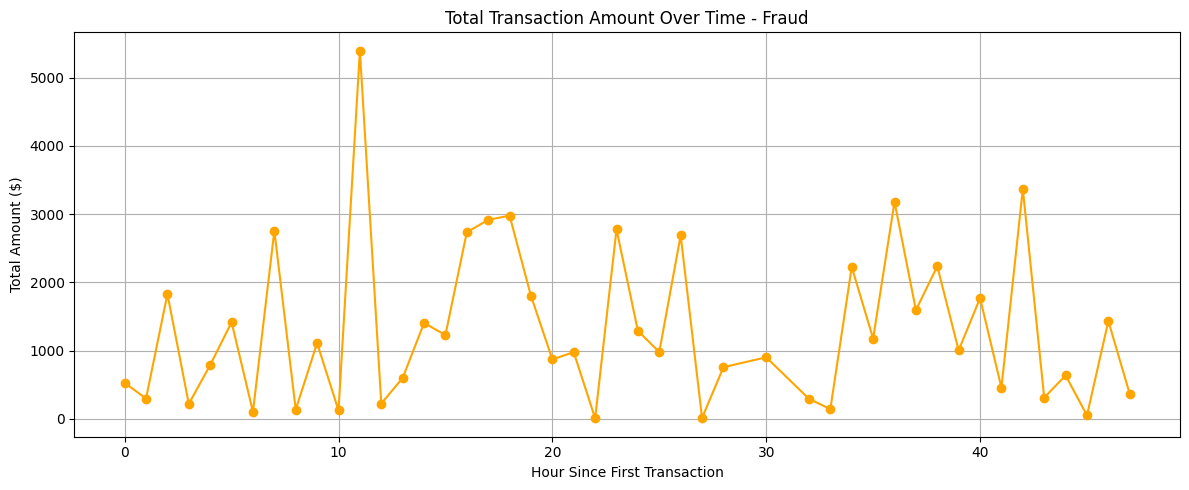

In [7]:
############################# Plot: amount of transaction  vs time
df["Time"] = df["Time"] - df["Time"].min()
df["Hour"] = (df["Time"] // 3600).astype(int)
non_fraud = df[df["Class"] == 0]
fraud = df[df["Class"] == 1]
non_fraud_amount = non_fraud.groupby("Hour")["Amount"].sum()
fraud_amount = fraud.groupby("Hour")["Amount"].sum()

# Non-Fraud
plt.figure(figsize=(12, 5))
plt.plot(non_fraud_amount.index, non_fraud_amount.values, marker='o', color='blue')
plt.title("Total Transaction Amount Over Time - Non-Fraud")
plt.xlabel("Hour Since First Transaction")
plt.ylabel("Total Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Fraud
plt.figure(figsize=(12, 5))
plt.plot(fraud_amount.index, fraud_amount.values, marker='o', color='orange')
plt.title("Total Transaction Amount Over Time - Fraud")
plt.xlabel("Hour Since First Transaction")
plt.ylabel("Total Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


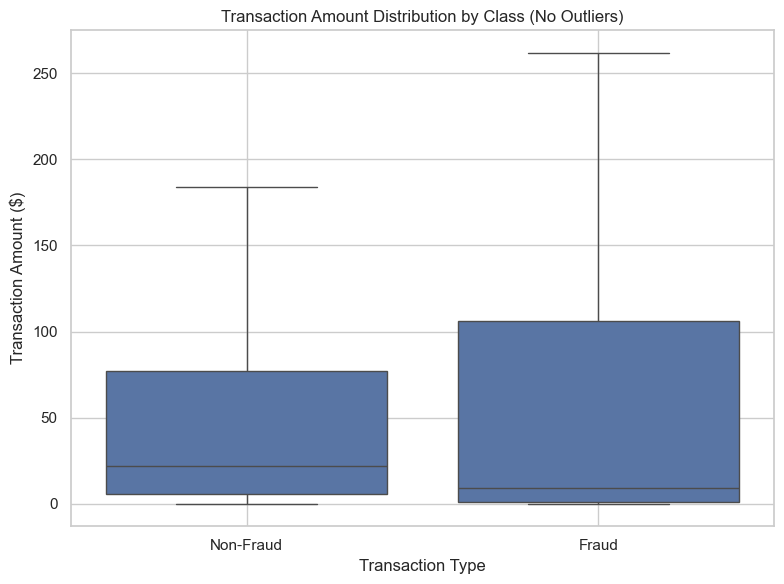

In [8]:
#boxplot 
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x="Class", y="Amount", data=df, showfliers=False)
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount ($)")
plt.title("Transaction Amount Distribution by Class (No Outliers)")
plt.grid(True)
plt.tight_layout()
plt.show()

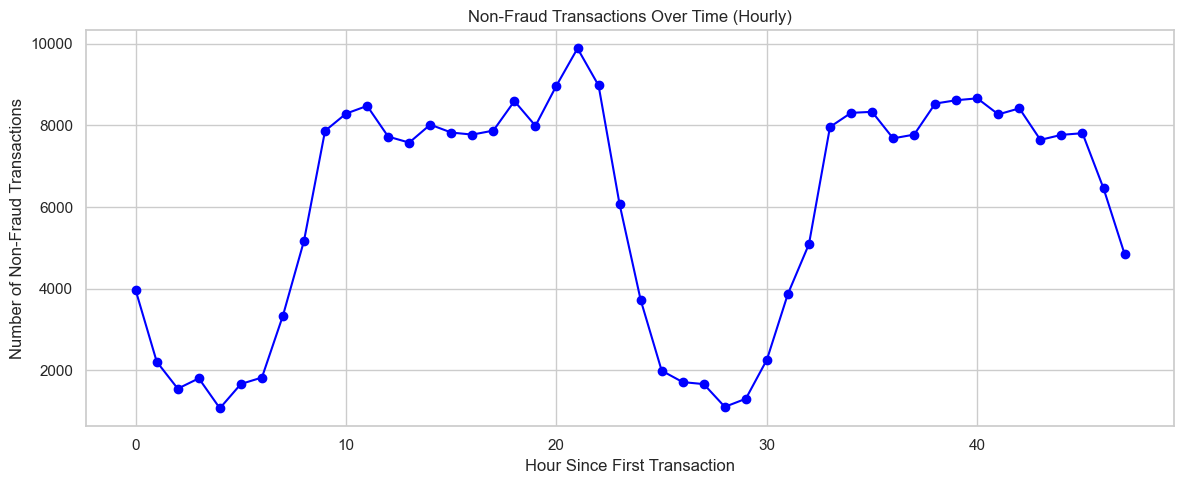

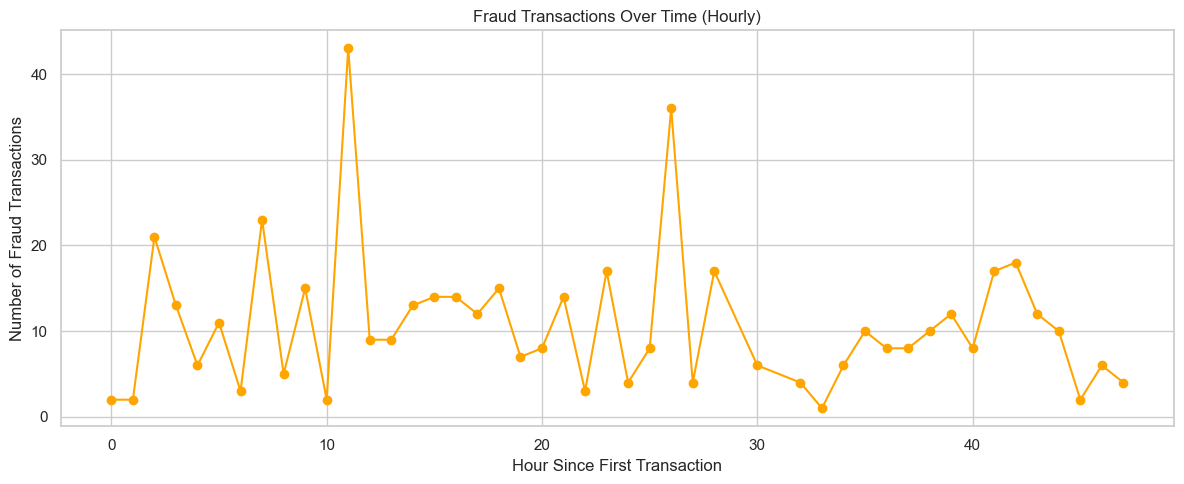

In [9]:
############################# Plot: number of transaction  vs time
non_fraud_counts = non_fraud.groupby("Hour").size()
fraud_counts = fraud.groupby("Hour").size()

# Non-Fraud
plt.figure(figsize=(12, 5))
plt.plot(non_fraud_counts.index, non_fraud_counts.values, marker='o', color='blue')
plt.title("Non-Fraud Transactions Over Time (Hourly)")
plt.xlabel("Hour Since First Transaction")
plt.ylabel("Number of Non-Fraud Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()

# Fraud
plt.figure(figsize=(12, 5))
plt.plot(fraud_counts.index, fraud_counts.values, marker='o', color='orange')
plt.title("Fraud Transactions Over Time (Hourly)")
plt.xlabel("Hour Since First Transaction")
plt.ylabel("Number of Fraud Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()
